# Project: Write a Data Science Blog Post - What makes developers happy?
Author: Wei Chong Ong

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a>
    <ul><li><a href="#overview">Project Overview</a>
    <li><a href="#datasets"> Stack Overflow Datasets</a>
    <li><a href="#questions">Questions</a>
        </ul>
        </li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul><li><a href="#gathering">Gathering</a>
        <li><a href="#assessing">Assessing</a>
        <li><a href="#cleaning">Cleaning</a>
    </ul>
    </li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#visualization">Visualize and Communicate Business Insights</a></li>
</ul>

<a id='intro' ></a>
# Introduction

<a id='overview' ></a>
## Project Overview
A data-driven approach to find out what makes developers happy with their job.

<a id='datasets' ></a>
## Stack Overflow Datasets
The Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software. Survey results from 2019 and 2020 are used for this project.

<a id='questions' ></a>
## Questions
<ol>
<li><p><a href="#q1"> Are developers happy with their profession?</a></p></li> 
<li><p><a href="#q2"> Which country has the happiest developers?</a></p></li> 
<li><p><a href="#q3"> Can money buy happiness? Does organisation size matters?</a></p></li> 
<li><p><a href="#q4"> In general, what drives developer to look for a new job?</a></p></li> 
<li><p><a href="#q5">  Which languages are growing in popularity?</a></p></li> 
</ol> 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import glob
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from millify import millify
%matplotlib inline
import Project1Functions as p1f

<a id='wrangling' ></a>
# Data Wrangling

<a id='gathering' ></a>
## Gathering

In [2]:
dfs = []
cols_df = []
years_ls = []
for file in glob.glob('./data/*.csv'):
    df = pd.read_csv(file)
    dfs.append(df)
    year = file.split('_')[-1].split('.')[0]
    years_ls.append(year)
    cols_df.append(pd.DataFrame({'Attributes': df.columns, 'SurveyYear': year}))
    
years_ls.insert(0,'Attributes')
attr_cmp_df = reduce(lambda left,right: pd.merge(left,right,on=['Attributes'],how='outer'), cols_df)
attr_cmp_df = attr_cmp_df.sort_values(by='Attributes')
attr_cmp_df.columns = years_ls

<a id='assessing' ></a>
## Assessing

### Find common attributes from 2019 and 2020 dataset

In [3]:
attr_cmp_df[attr_cmp_df['2020'].notna() & attr_cmp_df['2019'].notna()]

,Attributes,2020,2019
3,Age,2020,2019
4,Age1stCode,2020,2019
5,CompFreq,2020,2019
6,CompTotal,2020,2019
7,ConvertedComp,2020,2019
8,Country,2020,2019
9,CurrencyDesc,2020,2019
10,CurrencySymbol,2020,2019
11,DatabaseDesireNextYear,2020,2019
12,DatabaseWorkedWith,2020,2019


In [4]:
df_2019 = dfs[1].assign(SurveyYear='2019')
df_2020 = dfs[0].assign(SurveyYear='2020')

### Combine dataframes into one

In [5]:
df_combined = pd.concat([df_2020, df_2019], ignore_index=True, sort=False)

In [6]:
df_master = df_combined.copy()

## 1st Stage Cleaning

In [7]:
# Dropping missing JobSat (Response)
df_master = df_master.dropna(subset=['JobSat'])

In [8]:
# Job Satisfaction Level
jobsat_level = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 
                'Slightly dissatisfied', 'Very dissatisfied']

jslevel = pd.api.types.CategoricalDtype(ordered=True, categories=jobsat_level)

# Use pandas.astype() to convert the "JobSat" column from a plain object type into an ordered categorical type
df_master['JobSat'] = df_master['JobSat'].astype(jslevel)

In [9]:
# Organization Type
df_master['OrgType'] = df_master['OrgSize'].map(
    {'Just me - I am a freelancer, sole proprietor, etc.':'Freelancer, sole proprietor, etc.',
     '2-9 employees':'Small Enterprise',
     '2 to 9 employees':'Small Enterprise',
     'Fewer than 10 employees': 'Small Enterprise',
     '10 to 19 employees':'Small Enterprise',
     '20 to 99 employees':'Medium Enterprise',
     '100 to 499 employees':'Medium Enterprise',
     '500 to 999 employees':'Large Enterprise',
     '1,000 to 4,999 employees':'Large Enterprise',
     '5,000 to 9,999 employees':'Large Enterprise',
     '10,000 or more employees':'Large Enterprise'})

org_type = ['Freelancer, sole proprietor, etc.', 'Small Enterprise', 'Medium Enterprise', 'Large Enterprise']

<a id='eda' ></a>
# Exploratory Data Analysis

<a id='q1' ></a>
## 1. Are developers happy with their profession?

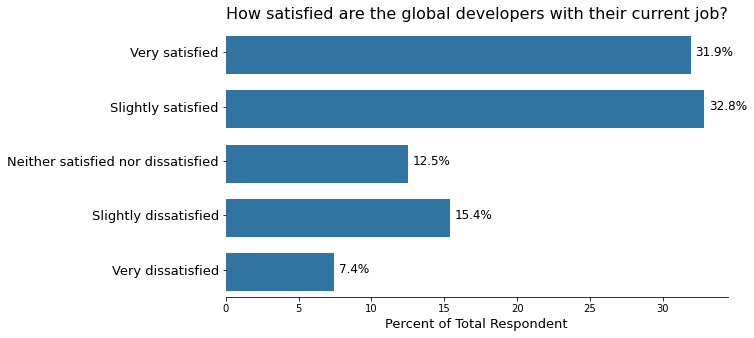

In [10]:
job_sat = df_master.groupby(['JobSat']).agg({'Respondent':'count'})
job_pcts = job_sat.apply(lambda x: 100*x/x.sum())
job_pcts.columns = ['PercentageByGroup']
job_pcts.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = [9, 5])
base_color = sns.color_palette()[0]
ax = sns.barplot(data = job_pcts, x = 'PercentageByGroup', y = 'JobSat', color = base_color);

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('')
ax.set_yticklabels(jobsat_level, fontsize=13)
ax.set_xlabel('Percent of Total Respondent', fontsize=13)
ax.set_title('How satisfied are the global developers with their current job?', fontsize=16)
p1f.autolabel(ax)
p1f.change_width(ax,.7)
plt.show()

> The statistic shows the satisfaction of global developers with their job in 2019 and 2020. According to the survey, about 64.7% of respondents report that they are either slightly or very satisfied with their job. Only 7.4% are very dissatisfied.

<a id='q2' ></a>
## 2. Which country has the happiest developers?

In [11]:
# Top 10 Countries with the most respondents
top10CountryList = list(df_master.groupby(['Country']).agg({'Respondent':'count'}).sort_values('Respondent', ascending=False)[:10].index)
df_country = df_master[df_master['Country'].apply(lambda x: x in top10CountryList)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


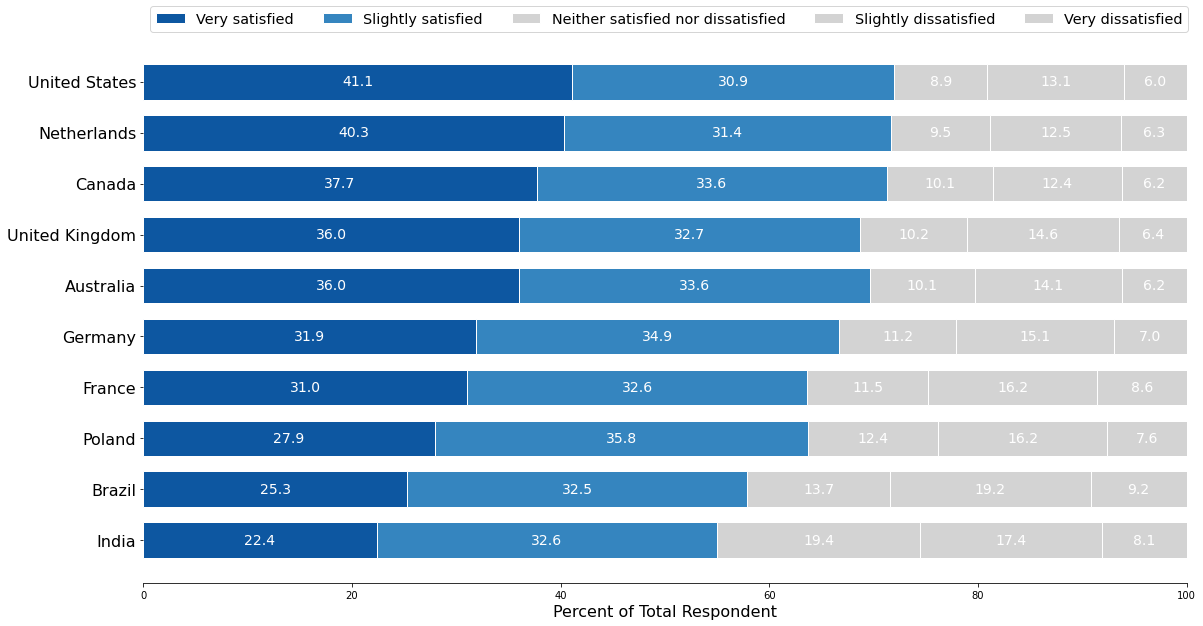

In [12]:
# Reference
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
country_sat = df_country.groupby(['Country','JobSat']).agg({'Respondent':'count'})
country_pcts = country_sat.groupby(level=0).apply(lambda x: 100*x/x.sum())
country_pcts.columns = ['PercentageByGroup']
country_pcts.reset_index(inplace=True)

category_names = jobsat_level
pivot_df = country_pcts.pivot(index = 'Country', columns = 'JobSat', values = 'PercentageByGroup')
pivot_df.sort_values(['Very satisfied','Slightly satisfied'], ascending = [False,False], inplace=True)
data = pivot_df.values
data_cum = data.cumsum(axis=1)
labels = ['{}'.format(v) for v in pivot_df.index]
category_colors = plt.get_cmap('Blues_r')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(18.7, 10))
ax.invert_yaxis()
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    if colname not in ['Very satisfied', 'Slightly satisfied']:
        color = 'lightgrey'
    rects = ax.barh(labels, widths, left=starts, height=0.7,label=colname, color=color, edgecolor = 'white')
    ax.bar_label(rects, fmt='%.1f',  
                label_type='center', color='white', fontsize=14)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels(labels, fontsize=16)
ax.set_xlabel('Percent of Total Respondent', fontsize=16)
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='x-large')
plt.show()

> - Developers in United States are the most satisfied at work while Brazilian and Indian developers are the least satisfied out of 10 countries surveyed.
> - Netherlands beats UK, Germany and France to offer highest job satisfaction for techies in Europe.

## 2nd Stage Cleaning

In [13]:
# Remove part time employment to have comparable annual salary
df_salary = df_master[df_master['Employment']!='Employed part-time']

In [14]:
# Focus only United State
df_salary_usa = df_salary[df_salary['Country'] == 'United States']

# Remove ConvertedComp value equal to 0
df_salary_usa = df_salary_usa[df_salary_usa['ConvertedComp'] != 0]

In [15]:
df_salary_usa.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs
count,26765.000000,23669.000000,2.274800e+04,2.269800e+04,24993.000000,12649.000000
mean,38922.135924,34.075998,4.884434e+242,2.378795e+05,42.267330,4.390082
std,24966.148690,9.642103,inf,4.282796e+05,7.911984,4.044747
min,4.000000,1.000000,0.000000e+00,1.000000e+00,1.000000,0.000000
25%,17966.000000,27.000000,7.700000e+04,8.100000e+04,40.000000,2.000000
50%,37278.000000,32.000000,1.050000e+05,1.150000e+05,40.000000,4.000000
75%,58448.000000,39.000000,1.430000e+05,1.600000e+05,45.000000,5.000000
max,88880.000000,99.000000,1.111111e+247,2.000000e+06,168.000000,99.000000


> Maximum value in ConvertedComp is set to be 2M

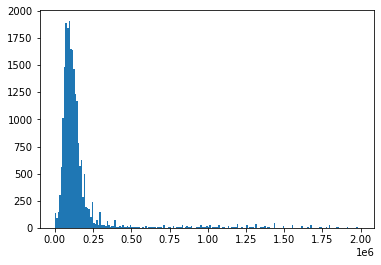

In [16]:
# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(df_salary_usa['ConvertedComp'].min(), df_salary_usa['ConvertedComp'].max(), 10000)

# Generate the x-ticks you want to apply
ticks = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000]

# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data = df_salary_usa, x = 'ConvertedComp', bins = bins);

In [17]:
len(df_salary_usa[df_salary_usa['ConvertedComp']==2000000])

947

> There are 947 respondents filled in the salary field with 2 million USD. This is certainly an error. Let's take a closer look at the compensation frequency and compensation total field.

### Wrong CompTotal

### Issue 1

In [18]:
df_salary_usa[df_salary_usa['CompTotal']>2000000][['CompFreq','CompTotal','ConvertedComp']]

,CompFreq,CompTotal,ConvertedComp
2488,NaN,1.000000e+15,NaN
9802,Monthly,5.000000e+09,2000000.0
41925,Yearly,2.500000e+06,2000000.0
42328,Weekly,1.111111e+247,1000000.0
47111,Weekly,1.000000e+150,2000000.0
47301,Weekly,1.000000e+16,2000000.0
69572,Weekly,5.000000e+06,2000000.0
70121,Yearly,2.400000e+06,2000000.0
70848,Monthly,1.200000e+07,3420.0
76260,Yearly,1.000000e+09,2000000.0


### Code 1

In [19]:
# Filter out CompTotal that more than 2M and replace CompTotal and ConvertedComp with NaN
errCompTotal_mask1 = np.where(df_salary_usa['CompTotal']>2000000,True, False)
df_salary_usa.loc[df_salary_usa[errCompTotal_mask1].index, 'CompTotal'] = np.nan
df_salary_usa.loc[df_salary_usa[errCompTotal_mask1].index, 'ConvertedComp'] = np.nan

#### Test 1

In [20]:
len(df_salary_usa[df_salary_usa['CompTotal']>2000000])

0

### Wrong CompFreq

### Issue 2

In [21]:
# ConvertedComp's limit is 2M. If the converted values exceed this 2M, it will stay as 2M
df_salary_usa[(df_salary_usa['CompFreq']!='Yearly') & (df_salary_usa['ConvertedComp']==2000000)][['CompFreq','CompTotal','ConvertedComp']]

,CompFreq,CompTotal,ConvertedComp
121,Weekly,120000.0,2000000.0
123,Monthly,200000.0,2000000.0
191,Weekly,120000.0,2000000.0
663,Weekly,150000.0,2000000.0
697,Weekly,52000.0,2000000.0
...,...,...,...
152623,Weekly,95000.0,2000000.0
152725,Weekly,130000.0,2000000.0
152727,Weekly,85000.0,2000000.0
152782,Weekly,185000.0,2000000.0


#### Code 2

In [22]:
# Filter out ConvertedComp equal 2M
errCompFreq_mask = np.where((df_salary_usa['CompFreq']!='Yearly') & (df_salary_usa['ConvertedComp']==2000000),True, False)

# Replace ConvertedComp with CompTotal value
df_salary_usa.loc[df_salary_usa[errCompFreq_mask].index, 'ConvertedComp'] = df_salary_usa.loc[errCompFreq_mask]['CompTotal']

#### Test 2

In [23]:
df_salary_usa.loc[errCompFreq_mask][['CompFreq','CompTotal','ConvertedComp']]

,CompFreq,CompTotal,ConvertedComp
121,Weekly,120000.0,120000.0
123,Monthly,200000.0,200000.0
191,Weekly,120000.0,120000.0
663,Weekly,150000.0,150000.0
697,Weekly,52000.0,52000.0
...,...,...,...
152623,Weekly,95000.0,95000.0
152725,Weekly,130000.0,130000.0
152727,Weekly,85000.0,85000.0
152782,Weekly,185000.0,185000.0


#### Issue 3 

In [24]:
# ConvertedComp more than 500k (unusual)
df_salary_usa[df_salary_usa['ConvertedComp']>500000][['CompFreq','CompTotal','ConvertedComp']]

,CompFreq,CompTotal,ConvertedComp
17,Monthly,105000.0,1260000.0
56,Monthly,135000.0,1620000.0
64,Monthly,98000.0,1176000.0
194,Monthly,160000.0,1920000.0
279,Monthly,92000.0,1104000.0
...,...,...,...
152177,Monthly,150000.0,1800000.0
152192,Monthly,74500.0,894000.0
152376,Monthly,70000.0,840000.0
152559,Monthly,75000.0,900000.0


#### Code 3

In [25]:
# Filter out ConvertedComp more than 500k
errCompFreq_mask2 = np.where(df_salary_usa['ConvertedComp']>500000,True, False)

# Replace ConvertedComp with CompTotal value
df_salary_usa.loc[df_salary_usa[errCompFreq_mask2].index, 'ConvertedComp'] = df_salary_usa.loc[errCompFreq_mask2]['CompTotal']

#### Test 3

In [26]:
df_salary_usa.loc[errCompFreq_mask2][['CompFreq','CompTotal','ConvertedComp']]

,CompFreq,CompTotal,ConvertedComp
17,Monthly,105000.0,105000.0
56,Monthly,135000.0,135000.0
64,Monthly,98000.0,98000.0
194,Monthly,160000.0,160000.0
279,Monthly,92000.0,92000.0
...,...,...,...
152177,Monthly,150000.0,150000.0
152192,Monthly,74500.0,74500.0
152376,Monthly,70000.0,70000.0
152559,Monthly,75000.0,75000.0


#### Wrong ConvertedComp

#### Issue 4

In [27]:
# ConvertedComp is not equal to CompTotal for yearly compensation
df_salary_usa[(df_salary_usa['ConvertedComp'].notna())&(df_salary_usa['ConvertedComp']!=df_salary_usa['CompTotal'])&(df_salary_usa['CompFreq']=='Yearly')][['JobSat','OrgSize','OrgType','CompFreq','CompTotal','ConvertedComp']]

,JobSat,OrgSize,OrgType,CompFreq,CompTotal,ConvertedComp
5755,Slightly dissatisfied,20 to 99 employees,Medium Enterprise,Yearly,120000.0,129718.0
25304,Slightly satisfied,"10,000 or more employees",Large Enterprise,Yearly,120000.0,129718.0
25850,Slightly dissatisfied,10 to 19 employees,Small Enterprise,Yearly,115000.0,10455.0
148815,Slightly satisfied,"5,000 to 9,999 employees",Large Enterprise,Yearly,720000.0,10075.0


#### Code 4

In [28]:
# Filter out wrong ConvertedComp value
errConvertedComp_mask = np.where((df_salary_usa['ConvertedComp'].notna())&(df_salary_usa['ConvertedComp']!=df_salary_usa['CompTotal'])&(df_salary_usa['CompFreq']=='Yearly'),True, False)

# Replace ConvertedComp with CompTotal value
df_salary_usa.loc[df_salary_usa[errConvertedComp_mask].index, 'ConvertedComp'] = df_salary_usa.loc[errConvertedComp_mask]['CompTotal']

#### Test 4

In [29]:
df_salary_usa.loc[errConvertedComp_mask][['CompFreq','CompTotal','ConvertedComp']]

,CompFreq,CompTotal,ConvertedComp
5755,Yearly,120000.0,120000.0
25304,Yearly,120000.0,120000.0
25850,Yearly,115000.0,115000.0
148815,Yearly,720000.0,720000.0


#### Issue 5

In [30]:
# ConvertedComp (annual salary) less than 10k (unusual)
df_salary_usa[df_salary_usa['ConvertedComp']<10000][['JobSat','OrgSize','OrgType','CompFreq','CompTotal','ConvertedComp']]

,JobSat,OrgSize,OrgType,CompFreq,CompTotal,ConvertedComp
1874,Slightly satisfied,100 to 499 employees,Medium Enterprise,Yearly,95.0,95.0
4167,Slightly dissatisfied,20 to 99 employees,Medium Enterprise,Yearly,140.0,140.0
4209,Very satisfied,20 to 99 employees,Medium Enterprise,Yearly,80.0,80.0
4567,Slightly satisfied,"10,000 or more employees",Large Enterprise,Yearly,310.0,310.0
4738,Neither satisfied nor dissatisfied,"10,000 or more employees",Large Enterprise,Yearly,65.0,65.0
...,...,...,...,...,...,...
146879,Neither satisfied nor dissatisfied,"Just me - I am a freelancer, sole proprietor, ...","Freelancer, sole proprietor, etc.",Yearly,1000.0,1000.0
148041,Very dissatisfied,100 to 499 employees,Medium Enterprise,Yearly,110.0,110.0
148512,Slightly satisfied,20 to 99 employees,Medium Enterprise,Yearly,145.0,145.0
148624,Very satisfied,20 to 99 employees,Medium Enterprise,Weekly,1.0,50.0


#### Code 5

In [31]:
# Filter out ConvertedComp less than 10k 
errConvertedComp_mask2 = np.where(df_salary_usa['ConvertedComp']<10000,True, False)

# Replace CompTotal and ConvertedComp with NaN
df_salary_usa.loc[df_salary_usa[errConvertedComp_mask2].index, 'CompTotal'] = np.nan
df_salary_usa.loc[df_salary_usa[errConvertedComp_mask2].index, 'ConvertedComp'] = np.nan

#### Test 5

In [32]:
df_salary_usa.loc[errConvertedComp_mask2][['CompFreq','CompTotal','ConvertedComp']]

,CompFreq,CompTotal,ConvertedComp
1874,Yearly,NaN,NaN
4167,Yearly,NaN,NaN
4209,Yearly,NaN,NaN
4567,Yearly,NaN,NaN
4738,Yearly,NaN,NaN
...,...,...,...
146879,Yearly,NaN,NaN
148041,Yearly,NaN,NaN
148512,Yearly,NaN,NaN
148624,Weekly,NaN,NaN


In [33]:
np.log10(df_salary_usa['ConvertedComp']).describe()

count    22556.000000
mean         5.032491
std          0.215589
min          4.000000
25%          4.903090
50%          5.037426
75%          5.161368
max          6.301030
Name: ConvertedComp, dtype: float64

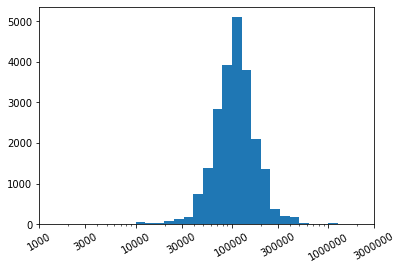

In [34]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(0, 6.3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000]

# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data = df_salary_usa, x = 'ConvertedComp', bins = bins)

# sns.distplot(bay_wheels_master['duration'], bins = bins, kde = False)
plt.xscale('log')

plt.xlim(1000,3000000)

# Apply x-ticks
plt.xticks(ticks, labels, rotation = 30);

> We could see from the histogram has a unimodal shape with one peak at about 100k. However, we could also see there are some outliers at about 1M. Earning 1M USD a year as a developer may be possible but certainly unusual.

<a id='visualization' ></a>
# Visualize and Communicate Business Insights

<a id='q3' ></a>
## 3. Can money buy happiness? Does organisation size matters?

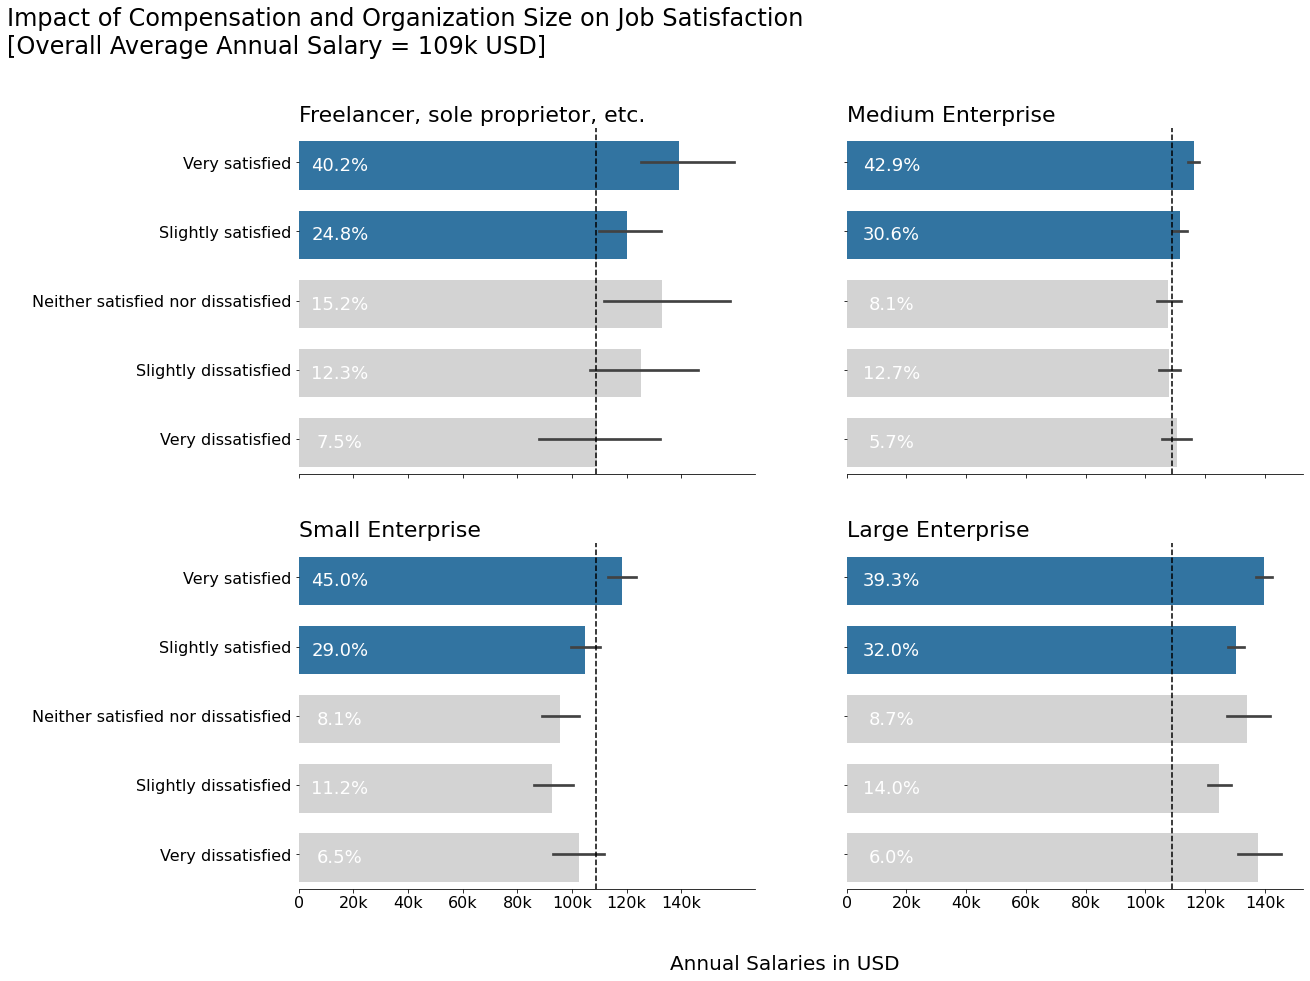

In [35]:
avg_salary_usa = df_salary_usa['ConvertedComp'].median()
org_type = ['Freelancer, sole proprietor, etc.', 'Small Enterprise', 'Medium Enterprise', 'Large Enterprise']
rows, cols = 2, 2
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row',figsize=(18,14))

i=0
ticks = np.arange(0,160000,20000)
labels = ['{}'.format(millify(v,precision=0)) for v in ticks]

for col in range(cols):
    for row in range(rows):
        temp = df_salary_usa[df_salary_usa['OrgType']==org_type[i]]
        orgsize_sat = temp.groupby(['JobSat']).agg({'Respondent':'count'})
        orgsize_pcts = orgsize_sat.apply(lambda x: 100*x/x.sum())
        orgsize_pcts.columns = ['PercentageByGroup']
        orgsize_pcts.reset_index(inplace=True)
        clrs = [base_color if (x in ['Very satisfied', 'Slightly satisfied']) else 'lightgrey' for x in orgsize_pcts['JobSat']]
        bar1 = sns.barplot(ax=ax[row, col], data = temp, x = 'ConvertedComp', y = 'JobSat', palette = clrs)
        ax[row, col].axvline(x=avg_salary_usa, color="black", ls='--')
        ax[row, col].set_title(org_type[i], fontsize=22, loc='left')
        ax[row, col].set_ylabel("")
        ax[row, col].set_xlabel("")
        ax[row, col].spines['left'].set_visible(False)
        ax[row, col].spines['right'].set_visible(False)
        ax[row, col].spines['top'].set_visible(False)
        # Apply x-ticks
        ax[row, col].set_xticks(ticks)
        ax[row, col].set_xticklabels(labels, fontsize=16)
        ax[row, col].set_yticklabels(jobsat_level, fontsize=16)
        p1f.change_width(ax[row, col],.7)
        j=0
        for bar in bar1.patches:

            bar1.annotate(str(np.round(orgsize_pcts.loc[j,'PercentageByGroup'],1))+'%', 
                          xy = (15000, 
                          bar.get_y() + bar.get_height() / 2), 
                          ha='center', va='center',
                          xytext=(0, 0),
                          textcoords='offset points',
                          fontsize=18, color = 'white')
            j+=1
            
        i+=1

fig.suptitle("Impact of Compensation and Organization Size on Job Satisfaction \n[Overall Average Annual Salary = {} USD]".format(millify(avg_salary_usa,precision=0)), ha='left', fontsize=24, x=-0.1, y=1)
fig.text(0.5, 0.05,'Annual Salaries in USD', ha='center', va='center', fontsize=20)
plt.show()

> - Compared to office employees, the variation in salary of full-time freelancers is the largest for all level of job satisfaction. Freelancer who is very satisfied with their job earns as much as developers from large enterprise. The spread is however bigger.
> - Developers in small enterprise generally earn below average, There is however an exception for the Very satisfied group, which consists of 45% of the respondents from small enterprise with an annual salary of about 120k. Does this mean that happiness can be bought using money in small enterprise?
> - In large enterprise, salary played an insignificant role on the job satisfaction. Only 39.3% of the respondents from large enterprise is very satisfied with their current job, which is the lowest compared to other organisation size.

<a id='q4' ></a>
## 4. In general, what drives you to look for a new job?

In [36]:
df_jobhunt = df_master.dropna(subset=['NEWJobHunt'])

In [37]:
varJobHunt = ['Just because',
'Having a bad day (or week or month) at work',
'Wanting to share accomplishments with a wider network',
'Curious about other opportunities',
'Better compensation',
'Trouble with my teammates',
'Trouble with my direct manager',
'Trouble with leadership at my company',
'Better work/life balance',
'Wanting to work with new technologies',
'Growth or leadership opportunities',
'Looking to relocate']

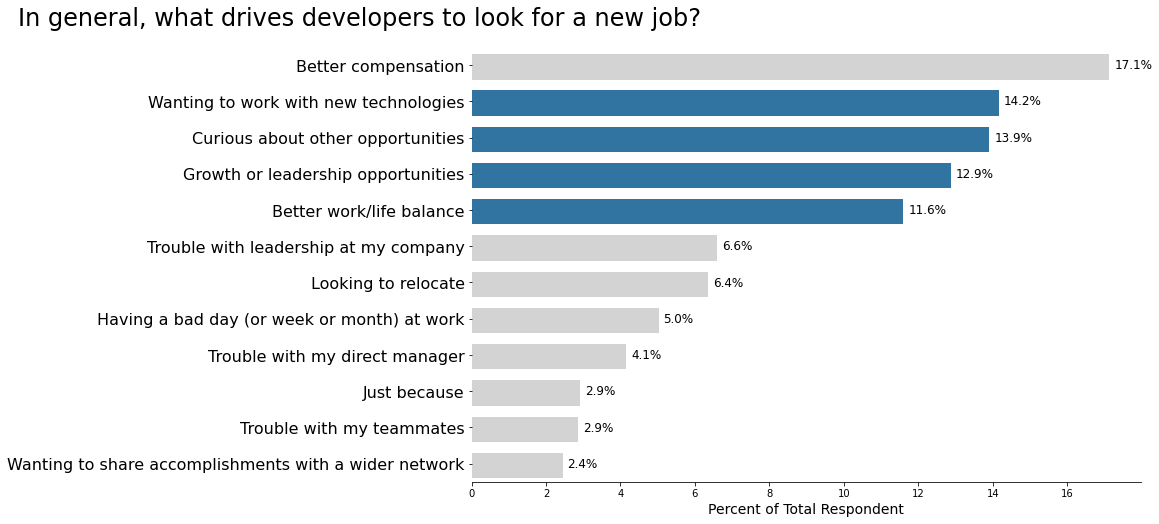

In [38]:
ls = ['Wanting to work with new technologies','Curious about other opportunities','Growth or leadership opportunities', 'Better work/life balance']
pct_jobHunt = p1f.clean(df_jobhunt, 'NEWJobHunt', varJobHunt, 'Reasons')
pct_jobHunt.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
clrs = [base_color if (x in ls) else 'lightgrey' for x in pct_jobHunt['Reasons']]
ax = sns.barplot(data = pct_jobHunt, x = 'count', y='Reasons', palette = clrs)
    
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('')
ax.set_yticklabels(pct_jobHunt['Reasons'], fontsize=16)
ax.set_xlabel('Percent of Total Respondent', fontsize=14)
p1f.autolabel(ax) 
p1f.change_width(ax, .7)
plt.suptitle('In general, what drives developers to look for a new job?', ha='left', fontsize=24, x=-0.4, y=0.95)
plt.show()

- Apart from compensation, developers are driven by technical challenges, rather than personnel issues.

<a id='q5' ></a>
## 5. Which languages are growing in popularity?

In [39]:
varLanguages = ['C','Java','JavaScript','Python','SQL','TypeScript','R','C#','HTML/CSS','Bash/Shell/PowerShell']

In [40]:
pct_df = p1f.pctByAttr(df_master, 'SurveyYear', 'LanguageDesireNextYear', varLanguages)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


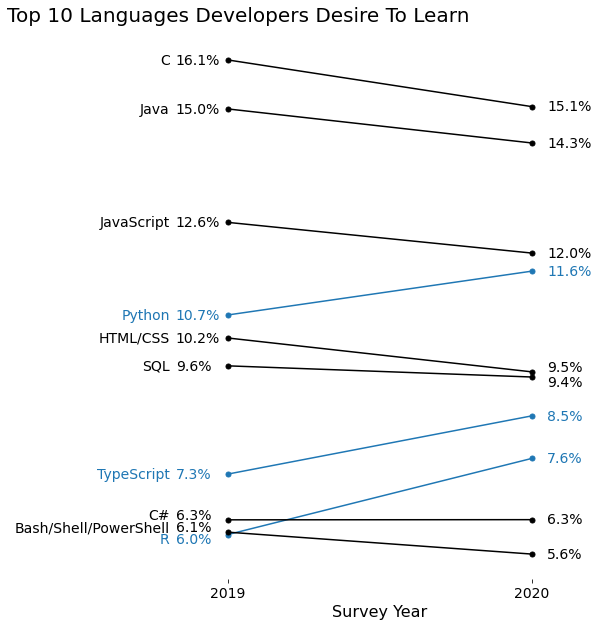

In [41]:
fig, ax = plt.subplots(1, figsize=(6,10))

for i in varLanguages:
    temp = pct_df[pct_df['LanguageDesireNextYear']==i]
    yvalue_19 = float(temp[(temp['SurveyYear']=='2019')]['Percentage'].values)
    yvalue_20 = float(temp[(temp['SurveyYear']=='2020')]['Percentage'].values)
    color = base_color if (yvalue_20-yvalue_19) > 0.1 else 'black'
    ax.plot(temp['SurveyYear'], temp['Percentage'], marker='o', markersize=5,
            c = color)
    # 2019
    xcoord = -0.15
    if i == 'R':
        ycoord = yvalue_19 - 0.1
    elif i == 'Bash/Shell/PowerShell':
        ycoord = yvalue_19 + 0.1
    elif i == 'C#':
        ycoord = yvalue_19 + 0.1
    else:
        ycoord = yvalue_19
    
    ax.annotate(str(np.round(yvalue_19,1)) + '%', xy = (xcoord, ycoord), xytext = (xcoord-0.02, ycoord), ha='left', va='center',
               annotation_clip=False, c =color, fontsize=14)
    ax.annotate(i, xy = (xcoord, ycoord), xytext = (xcoord-0.04, ycoord), ha='right', va='center',
               annotation_clip=False, c =color, fontsize=14)

    # 2020
    xcoord = 1.05
    if i == 'SQL':
        ycoord = yvalue_20 - 0.1
    elif i == 'HTML/CSS':
        ycoord = yvalue_20 + 0.1
    else:
        ycoord = yvalue_20
    
    ax.annotate(str(np.round(yvalue_20,1)) + '%', xy = (xcoord, ycoord), xytext = (xcoord, ycoord), ha='left', va='center',
               annotation_clip=False, c =color, fontsize=14)

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('')
ax.set_xlabel('Survey Year', fontsize=16)
# ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels(['2019', '2020'], fontsize=14)
fig.suptitle('Top 10 Languages Developers Desire To Learn', ha='left', fontsize=20, x=-0.35, y=0.92)
plt.show()

> - From 2019 to 2020, C remains the most popular programming language and has the largest developer community but Python, TypeScript and R are growing in popularity  in the past year.